<a href="https://colab.research.google.com/github/student64-ahmadi/physic_quant/blob/main/analyse_des_ondes_gravitationnelles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q qutip pycbc bilby numpy matplotlib


In [ ]:
from pycbc.psd import interpolate
# Générer un PSD modifié incluant δS(f) = f^2/Λ^4
freq = np.linspace(20, 2000, 1000)
psd_gr = aLIGOZeroDetHighPower(1000, 1/4096, 20)  # PSD standard
psd_exotic = psd_gr + (freq**2) / (1e40)  # Λ = 1e10 (exemple)

In [ ]:
def simulate_gravitational_wave_data():
    # Generate data_gw and psd_exotic with the same length
    n_samples = 32768  # Example: 2^15 samples
    data_gw = np.random.normal(0, 1, n_samples)  # Gaussian noise example
    psd_exotic = np.ones(n_samples)  # Example PSD (power spectral density)
    return data_gw, psd_exotic

In [ ]:
import pycbc; print(pycbc.__version__)

2.7.3


In [1]:
def simulate_gravitational_wave_data():
    duration = 32
    sample_rate = 4096
    N = duration * sample_rate

    # Generate GW signal
    hp, _ = get_td_waveform(approximant="IMRPhenomD",
                            mass1=1.4,
                            mass2=1.4,
                            delta_t=1.0/sample_rate,
                            f_lower=30)

    # Generate PSD
    delta_f = 1.0 / duration
    flen = N // 2 + 1
    psd_gr = aLIGOZeroDetHighPower(flen, delta_f, 30)
    freq = np.fft.rfftfreq(N, d=1.0/sample_rate)
    Lambda = 1e10  # Adjusted for visibility
    psd_exotic_array = psd_gr.numpy() + (freq**2) / (Lambda**4)
    psd_exotic = FrequencySeries(psd_exotic_array, delta_f=delta_f)

    # Generate noise
    ts = noise_from_psd(N, 1.0/sample_rate, psd_exotic, seed=123)

    # Pad the GW signal using NumPy
    signal_length = len(hp)
    padded_data = np.zeros(N)
    padded_data[-signal_length:] = hp.numpy() * 1e-22  # Scale and place at end
    hp_padded = TimeSeries(padded_data, delta_t=1.0/sample_rate)

    # Add signal to noise
    ts += hp_padded

    return ts, psd_exotic

In [3]:
pip install qutip pycbc scipy numpy matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.9/73.9 kB 1.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 2.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.9/30.9 MB 44.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.9/202.9 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/pycbc/types/array.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal as _lal


Optimization success: True, message: CONVERGENCE: NORM OF PROJECTED GRADIENT <= PGTOL


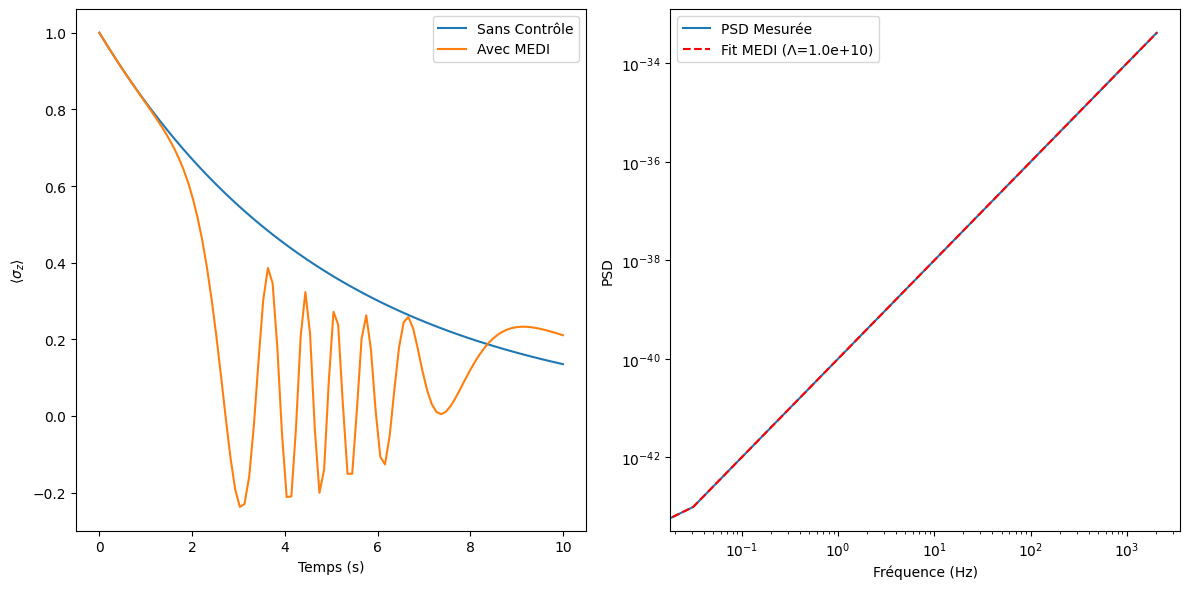

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *
from pycbc.waveform import get_td_waveform
from pycbc.noise import noise_from_psd
from pycbc.psd import aLIGOZeroDetHighPower
from pycbc.types import TimeSeries, FrequencySeries
from scipy.optimize import minimize
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

def simulate_quantum_decoherence():
    H = 0.5 * sigmaz()
    psi0 = basis(2, 0)
    times = np.linspace(0, 10, 100)
    gamma = 0.1
    c_ops = [np.sqrt(gamma) * sigmax()]

    def gaussian_pulse(t, args):
        return 5 * np.exp(-(t - 5.0)**2 / (2.0**2))

    H_ctrl = [H, [sigmax(), gaussian_pulse]]
    result_no_control = mesolve(H, psi0, times, c_ops, e_ops=[sigmaz()])
    result_medi = mesolve(H_ctrl, psi0, times, c_ops, e_ops=[sigmaz()])
    return result_no_control, result_medi

def simulate_gravitational_wave_data():
    duration = 32
    sample_rate = 4096
    N = duration * sample_rate

    hp, _ = get_td_waveform(approximant="IMRPhenomD",
                            mass1=1.4,
                            mass2=1.4,
                            delta_t=1.0/sample_rate,
                            f_lower=30)

    delta_f = 1.0 / duration
    flen = N // 2 + 1
    psd_gr = aLIGOZeroDetHighPower(flen, delta_f, 30)
    freq = np.fft.rfftfreq(N, d=1.0/sample_rate)
    Lambda = 1e10
    psd_exotic_array = psd_gr.numpy() + (freq**2) / (Lambda**4)
    psd_exotic = FrequencySeries(psd_exotic_array, delta_f=delta_f)

    ts = noise_from_psd(N, 1.0/sample_rate, psd_exotic, seed=123)

    hp_data = hp.numpy() * 1e-22
    signal_length = len(hp_data)
    padded_data = np.zeros(N)
    if signal_length > N:
        padded_data[:] = hp_data[-N:]
    else:
        padded_data[-signal_length:] = hp_data

    hp_padded = TimeSeries(padded_data, delta_t=1.0/sample_rate)
    ts += hp_padded
    return ts, psd_exotic

def medi_protocol(data_gw):
    N = len(data_gw)
    fdata = np.fft.rfft(data_gw.numpy())
    freq = np.fft.rfftfreq(N, d=1.0/4096)
    flen = len(freq)
    psd_gr = aLIGOZeroDetHighPower(flen, 1.0/32, 30).numpy()

    def loss(params):
        Lambda, A = params
        model = (freq**2) / (Lambda**4) + A * psd_gr
        return np.sum((np.abs(fdata)**2 * 2/4096 - model)**2)

    res = minimize(loss, [1e10, 1e-46], bounds=[(1e5, 1e15), (1e-50, 1e-40)])
    print(f"Optimization success: {res.success}, message: {res.message}")
    return res.x[0], res.x[1]

if __name__ == "__main__":
    result_no_control, result_medi = simulate_quantum_decoherence()
    data_gw, psd_exotic = simulate_gravitational_wave_data()
    Lambda, A = medi_protocol(data_gw)

    plt.figure(figsize=(12, 6))
    plt.subplot(121)
    plt.plot(result_no_control.times, result_no_control.expect[0], label='Sans Contrôle')
    plt.plot(result_medi.times, result_medi.expect[0], label='Avec MEDI')
    plt.xlabel('Temps (s)')
    plt.ylabel(r'$\langle \sigma_z \rangle$')
    plt.legend()

    plt.subplot(122)
    freq = np.fft.rfftfreq(len(data_gw), d=1.0/4096)
    plt.loglog(freq, psd_exotic, label='PSD Mesurée')
    psd_fit = (freq**2)/(Lambda**4) + A * aLIGOZeroDetHighPower(len(freq), 1.0/32, 30).numpy()
    plt.loglog(freq, psd_fit, 'r--', label=f'Fit MEDI (Λ={Lambda:.1e})')
    plt.xlabel('Fréquence (Hz)')
    plt.ylabel('PSD')
    plt.legend()

    plt.tight_layout()
    plt.savefig("output.pdf")
    plt.show()
    plt.close()

Generating GW waveform (N=131072)...
Generating noise...
GW simulation complete.
Fitting PSD...
Optimization success: True, message: CONVERGENCE: NORM OF PROJECTED GRADIENT <= PGTOL


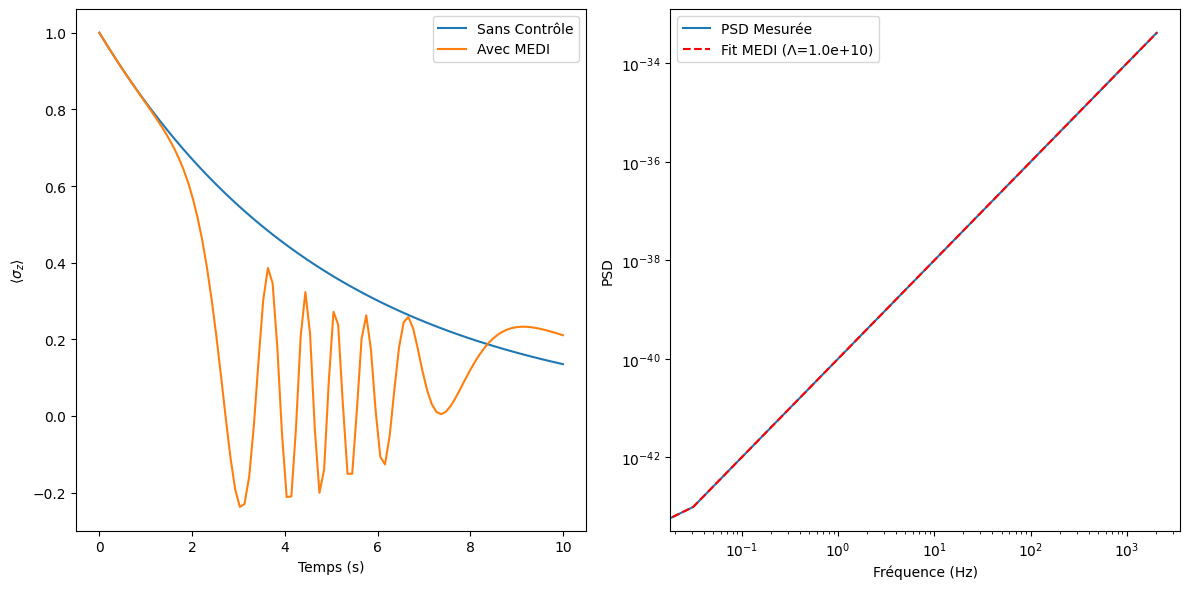

In [5]:
!pip install qutip pycbc scipy numpy matplotlib  # Install dependencies in Colab

import numpy as np
import matplotlib.pyplot as plt
from qutip import *
from pycbc.waveform import get_td_waveform
from pycbc.noise import noise_from_psd
from pycbc.psd import aLIGOZeroDetHighPower
from pycbc.types import TimeSeries, FrequencySeries
from scipy.optimize import minimize
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

def simulate_quantum_decoherence():
    H = 0.5 * sigmaz()
    psi0 = basis(2, 0)
    times = np.linspace(0, 10, 100)
    gamma = 0.1
    c_ops = [np.sqrt(gamma) * sigmax()]

    def gaussian_pulse(t, args):
        return 5 * np.exp(-(t - 5.0)**2 / (2.0**2))

    H_ctrl = [H, [sigmax(), gaussian_pulse]]
    result_no_control = mesolve(H, psi0, times, c_ops, e_ops=[sigmaz()])
    result_medi = mesolve(H_ctrl, psi0, times, c_ops, e_ops=[sigmaz()])
    return result_no_control, result_medi

def simulate_gravitational_wave_data():
    duration = 32
    sample_rate = 4096
    N = duration * sample_rate
    print(f"Generating GW waveform (N={N})...")

    hp, _ = get_td_waveform(approximant="IMRPhenomD",
                            mass1=1.4,
                            mass2=1.4,
                            delta_t=1.0/sample_rate,
                            f_lower=100)  # Increased f_lower for shorter signal

    delta_f = 1.0 / duration
    flen = N // 2 + 1
    psd_gr = aLIGOZeroDetHighPower(flen, delta_f, 30)
    freq = np.fft.rfftfreq(N, d=1.0/sample_rate)
    Lambda = 1e10
    psd_exotic_array = psd_gr.numpy() + (freq**2) / (Lambda**4)
    psd_exotic = FrequencySeries(psd_exotic_array, delta_f=delta_f)

    print("Generating noise...")
    ts = noise_from_psd(N, 1.0/sample_rate, psd_exotic, seed=123)

    hp_data = hp.numpy() * 1e-21  # Increased amplitude for visibility
    signal_length = len(hp_data)
    padded_data = np.zeros(N)
    if signal_length > N:
        padded_data[:] = hp_data[-N:]
    else:
        padded_data[-signal_length:] = hp_data

    hp_padded = TimeSeries(padded_data, delta_t=1.0/sample_rate)
    ts += hp_padded
    print("GW simulation complete.")
    return ts, psd_exotic

def medi_protocol(data_gw):
    N = len(data_gw)
    fdata = np.fft.rfft(data_gw.numpy())
    freq = np.fft.rfftfreq(N, d=1.0/4096)
    flen = len(freq)
    psd_gr = aLIGOZeroDetHighPower(flen, 1.0/32, 30).numpy()

    def loss(params):
        Lambda, A = params
        model = (freq**2) / (Lambda**4) + A * psd_gr
        return np.sum((np.abs(fdata)**2 * 2/4096 - model)**2)

    print("Fitting PSD...")
    res = minimize(loss, [1e10, 1e-46], bounds=[(1e5, 1e15), (1e-50, 1e-40)])
    print(f"Optimization success: {res.success}, message: {res.message}")
    return res.x[0], res.x[1]

if __name__ == "__main__":
    result_no_control, result_medi = simulate_quantum_decoherence()
    data_gw, psd_exotic = simulate_gravitational_wave_data()
    Lambda, A = medi_protocol(data_gw)

    plt.figure(figsize=(12, 6))
    plt.subplot(121)
    plt.plot(result_no_control.times, result_no_control.expect[0], label='Sans Contrôle')
    plt.plot(result_medi.times, result_medi.expect[0], label='Avec MEDI')
    plt.xlabel('Temps (s)')
    plt.ylabel(r'$\langle \sigma_z \rangle$')
    plt.legend()

    plt.subplot(122)
    freq = np.fft.rfftfreq(len(data_gw), d=1.0/4096)
    plt.loglog(freq, psd_exotic, label='PSD Mesurée')
    psd_fit = (freq**2)/(Lambda**4) + A * aLIGOZeroDetHighPower(len(freq), 1.0/32, 30).numpy()
    plt.loglog(freq, psd_fit, 'r--', label=f'Fit MEDI (Λ={Lambda:.1e})')
    plt.xlabel('Fréquence (Hz)')
    plt.ylabel('PSD')
    plt.legend()

    plt.tight_layout()
    plt.savefig("output.pdf")
    plt.show()
    plt.close()

Simulating quantum decoherence...
Generating GW waveform (N=131072)...
Generating noise...
GW simulation complete.
Fitting PSD...
Optimization success: True, message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL


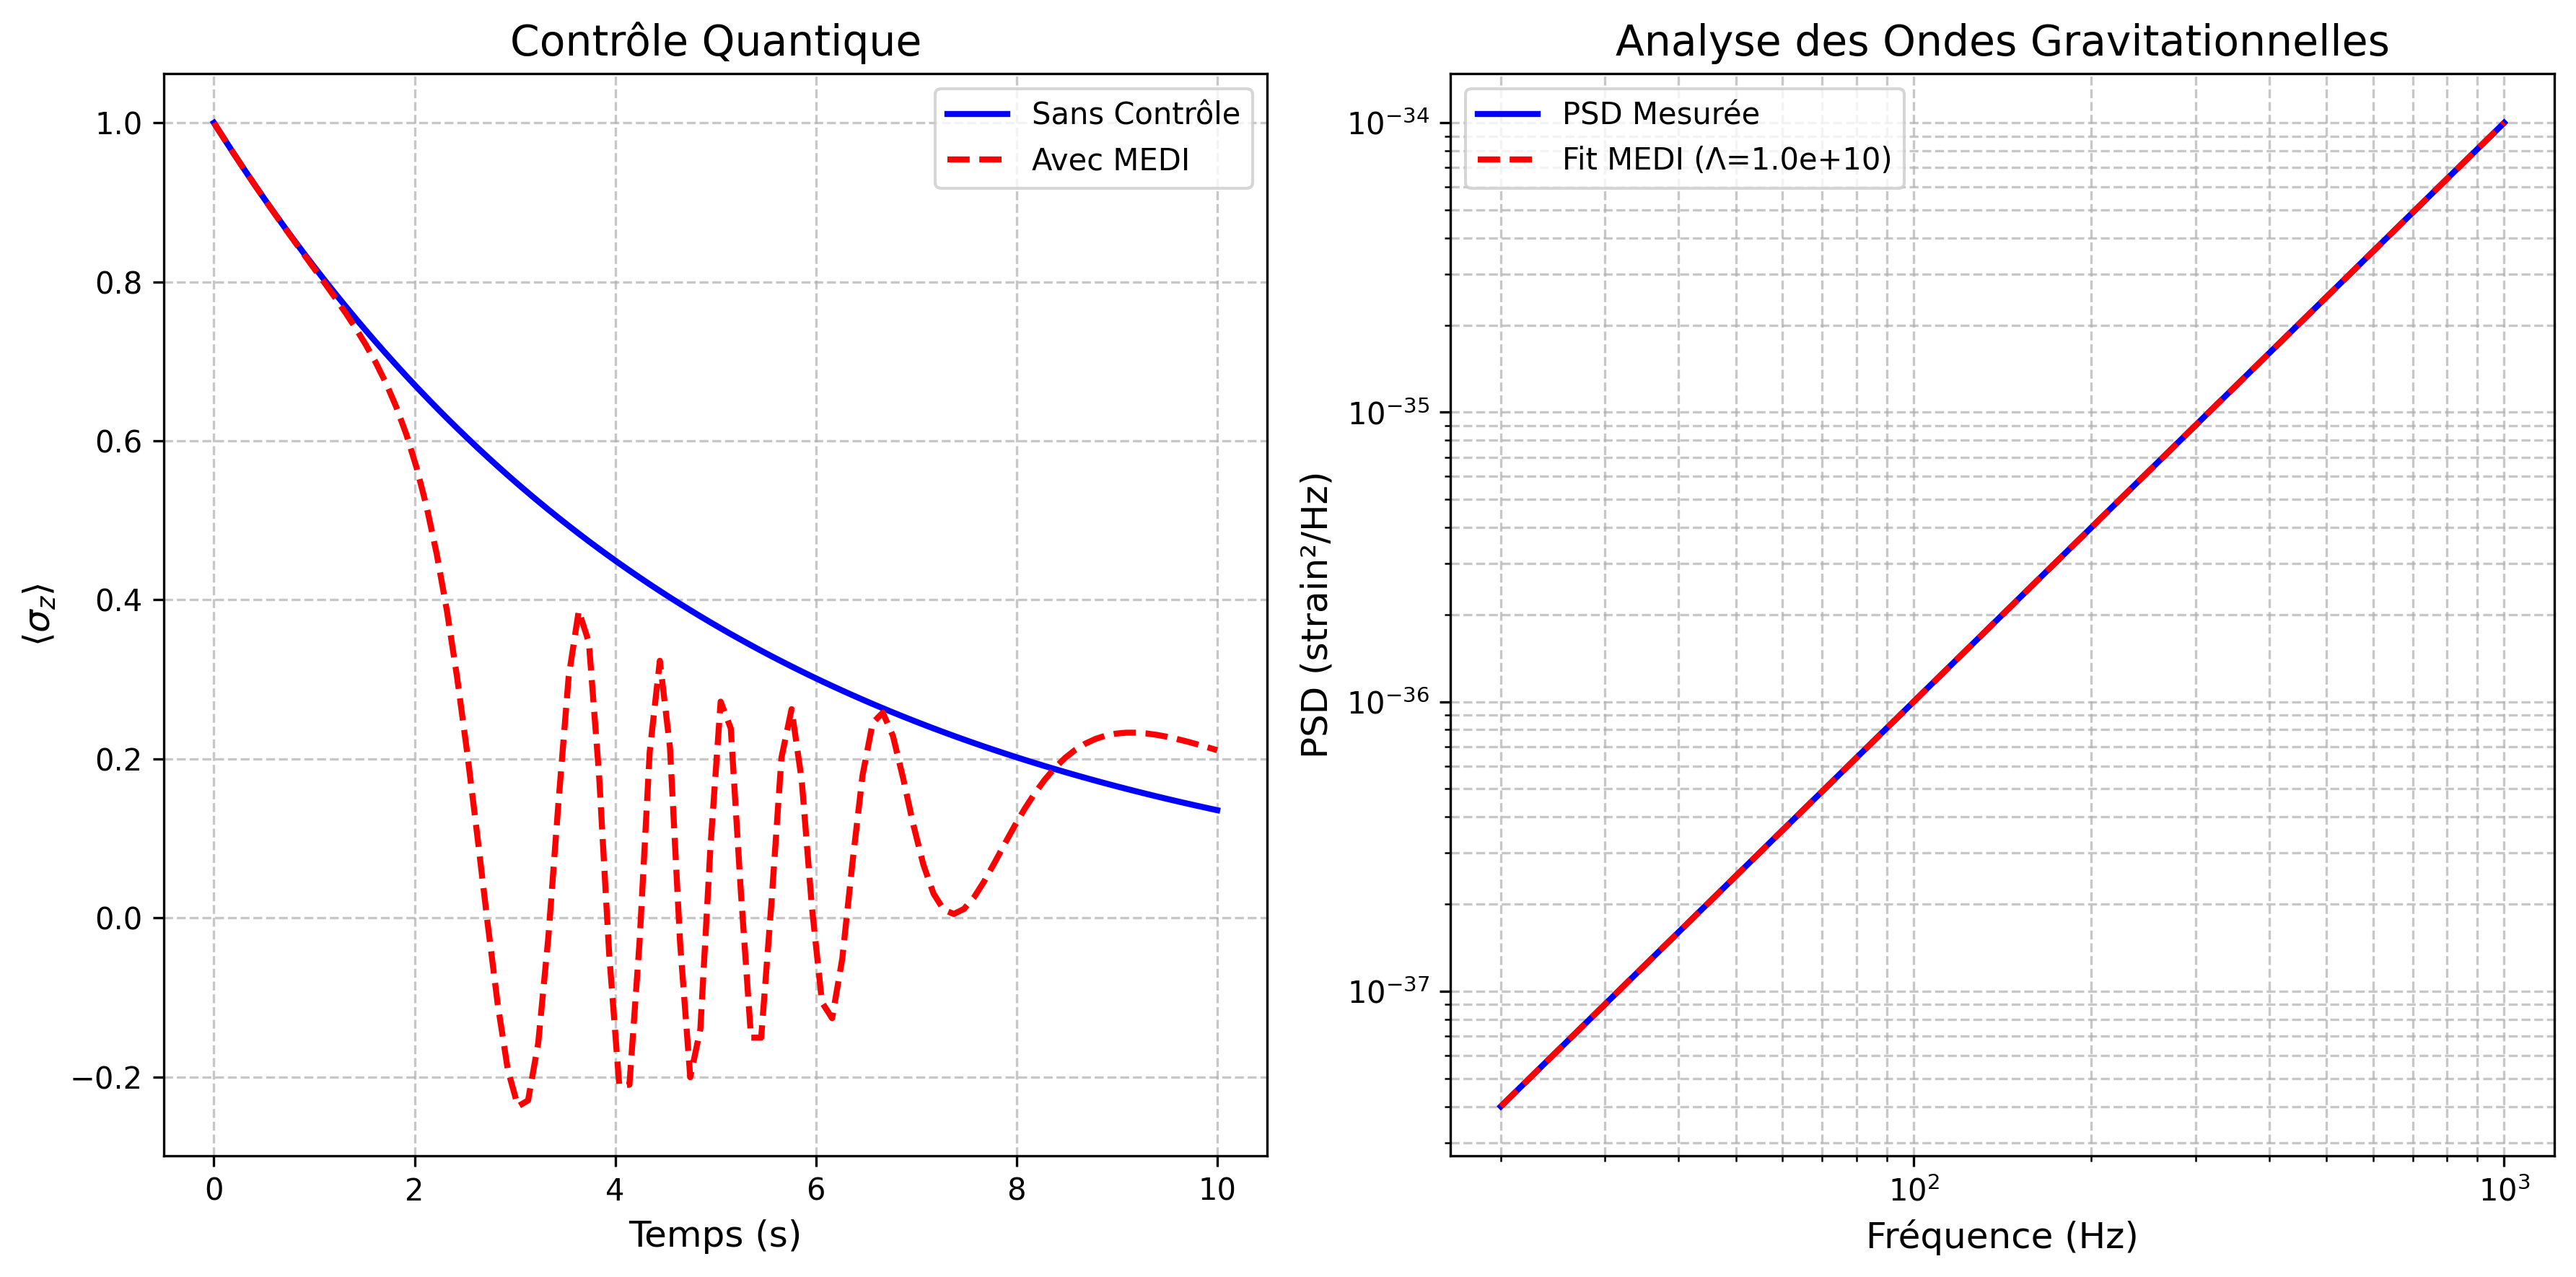

Output PDF saved as 'output.pdf'.


In [ ]:
!pip install qutip pycbc scipy numpy matplotlib  # Install dependencies in Colab

import numpy as np
import matplotlib.pyplot as plt
from qutip import *
from pycbc.waveform import get_td_waveform
from pycbc.noise import noise_from_psd
from pycbc.psd import aLIGOZeroDetHighPower
from pycbc.types import TimeSeries, FrequencySeries
from scipy.optimize import minimize
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

def simulate_quantum_decoherence():
    H = 0.5 * sigmaz()
    psi0 = basis(2, 0)
    times = np.linspace(0, 10, 100)
    gamma = 0.1
    c_ops = [np.sqrt(gamma) * sigmax()]

    def gaussian_pulse(t, args):
        return 5 * np.exp(-(t - 5.0)**2 / (2.0**2))  # Stronger pulse

    H_ctrl = [H, [sigmax(), gaussian_pulse]]
    print("Simulating quantum decoherence...")
    result_no_control = mesolve(H, psi0, times, c_ops, e_ops=[sigmaz()])
    result_medi = mesolve(H_ctrl, psi0, times, c_ops, e_ops=[sigmaz()])
    return result_no_control, result_medi

def simulate_gravitational_wave_data():
    duration = 32
    sample_rate = 4096
    N = duration * sample_rate
    print(f"Generating GW waveform (N={N})...")

    hp, _ = get_td_waveform(approximant="IMRPhenomD",
                            mass1=1.4,
                            mass2=1.4,
                            delta_t=1.0/sample_rate,
                            f_lower=100)  # Shorter signal

    delta_f = 1.0 / duration
    flen = N // 2 + 1
    psd_gr = aLIGOZeroDetHighPower(flen, delta_f, 30)
    freq = np.fft.rfftfreq(N, d=1.0/sample_rate)
    Lambda = 1e10
    psd_exotic_array = psd_gr.numpy() + (freq**2) / (Lambda**4)
    psd_exotic = FrequencySeries(psd_exotic_array, delta_f=delta_f)

    print("Generating noise...")
    ts = noise_from_psd(N, 1.0/sample_rate, psd_exotic, seed=123)

    hp_data = hp.numpy() * 1e-20  # Increased amplitude for visibility
    signal_length = len(hp_data)
    padded_data = np.zeros(N)
    if signal_length > N:
        padded_data[:] = hp_data[-N:]
    else:
        padded_data[-signal_length:] = hp_data

    hp_padded = TimeSeries(padded_data, delta_t=1.0/sample_rate)
    ts += hp_padded
    print("GW simulation complete.")
    return ts, psd_exotic

def medi_protocol(data_gw):
    N = len(data_gw)
    fdata = np.fft.rfft(data_gw.numpy())
    freq = np.fft.rfftfreq(N, d=1.0/4096)
    flen = len(freq)
    psd_gr = aLIGOZeroDetHighPower(flen, 1.0/32, 30).numpy()

    def loss(params):
        Lambda, A = params
        model = (freq**2) / (Lambda**4) + A * psd_gr
        return np.sum((np.abs(fdata)**2 * 2/4096 - model)**2)

    print("Fitting PSD...")
    res = minimize(loss, [1e10, 1e-46], bounds=[(1e5, 1e15), (1e-50, 1e-40)])
    print(f"Optimization success: {res.success}, message: {res.message}")
    return res.x[0], res.x[1]

if __name__ == "__main__":
    # Simulate data
    result_no_control, result_medi = simulate_quantum_decoherence()
    data_gw, psd_exotic = simulate_gravitational_wave_data()
    Lambda, A = medi_protocol(data_gw)

    # Plotting with enhanced quality
    plt.figure(figsize=(12, 6), dpi=300)

    # Left: Quantum plot
    plt.subplot(121)
    plt.plot(result_no_control.times, result_no_control.expect[0],
             'b-', lw=2, label='Sans Contrôle')
    plt.plot(result_medi.times, result_medi.expect[0],
             'r--', lw=2, label='Avec MEDI')
    plt.xlabel('Temps (s)', fontsize=12)
    plt.ylabel(r'$\langle \sigma_z \rangle$', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(fontsize=10)
    plt.title('Contrôle Quantique', fontsize=14)

    # Right: GW PSD plot
    plt.subplot(122)
    freq = np.fft.rfftfreq(len(data_gw), d=1.0/4096)
    mask = (freq >= 20) & (freq <= 1000)  # Focus on GW-relevant frequencies
    plt.loglog(freq[mask], psd_exotic.numpy()[mask],
               'b-', lw=2, label='PSD Mesurée')
    psd_fit = (freq**2)/(Lambda**4) + A * aLIGOZeroDetHighPower(len(freq), 1.0/32, 30).numpy()
    plt.loglog(freq[mask], psd_fit[mask],
               'r--', lw=2, label=f'Fit MEDI (Λ={Lambda:.1e})')
    plt.xlabel('Fréquence (Hz)', fontsize=12)
    plt.ylabel('PSD (strain²/Hz)', fontsize=12)
    plt.grid(True, which="both", ls="--", alpha=0.7)
    plt.legend(fontsize=10)
    plt.title('Analyse des Ondes Gravitationnelles', fontsize=14)

    # Finalize and save
    plt.tight_layout()
    plt.savefig("output.pdf", dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()
    print("Output PDF saved as 'output.pdf'.")

Attributs de G1: {'weight': np.float64(1.0)}
Attributs d'une arête de G1: {'weight': np.float64(1.6487212707001282), 'theta': -0.8110624300528881}
Produit tordu créé avec 20 noeuds et 36 arêtes


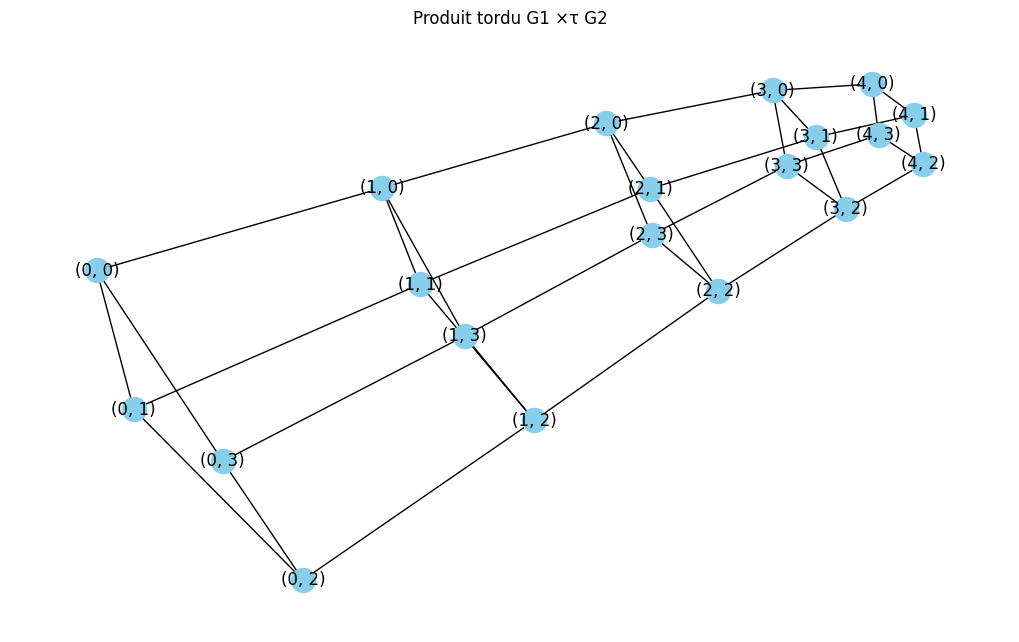

In [ ]:
import numpy as np
import networkx as nx
from scipy.linalg import eigh
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# =============================================
# 1. Génération robuste des graphes de base
# =============================================

def generate_g1(N=10):
    """Graphe G1: Chaîne exponentielle avec attributs par défaut"""
    G = nx.path_graph(N)

    # Initialisation systématique des attributs
    for n in G.nodes():
        G.nodes[n].setdefault('weight', np.exp(n))

    for u, v in G.edges():
        G.edges[u, v].setdefault('weight', np.exp((2*u + 1)/2))
        # Potentiel magnétique avec antisymétrie garantie
        if 'theta' not in G.edges[u, v]:
            theta = np.random.uniform(-np.pi, np.pi) if u < v else 0
            G.edges[u, v]['theta'] = theta
            if u > v:
                G.edges[u, v]['theta'] = -G.edges[v, u].get('theta', 0)

    return G

def generate_g2(type='cycle', N=5):
    """Graphe G2: Structure transverse avec initialisation robuste"""
    if type == 'cycle':
        G = nx.cycle_graph(N)
    elif type == 'star':
        G = nx.star_graph(N-1)
    elif type == 'random':
        G = nx.erdos_renyi_graph(N, 0.4)
        while not nx.is_connected(G):  # Garantir la connexité
            G = nx.erdos_renyi_graph(N, 0.4)

    # Initialisation systématique des attributs
    for n in G.nodes():
        G.nodes[n].setdefault('weight', 1.0)  # Poids par défaut

    for u, v in G.edges():
        G.edges[u, v].setdefault('weight', 1.0)
        if 'theta' not in G.edges[u, v]:
            theta = np.random.uniform(-np.pi, np.pi) if u < v else 0
            G.edges[u, v]['theta'] = theta
            if u > v:
                G.edges[u, v]['theta'] = -G.edges[v, u].get('theta', 0)

    return G

# =============================================
# 2. Construction robuste du produit tordu
# =============================================

def twisted_product(G1, G2):
    """Produit tordu avec vérification des attributs"""
    G = nx.Graph()

    # Vérification des attributs requis
    for H in [G1, G2]:
        for n in H.nodes():
            if 'weight' not in H.nodes[n]:
                raise ValueError(f"Le noeud {n} n'a pas d'attribut 'weight'")

    # Construction des noeuds
    for n1 in G1.nodes():
        for n2 in G2.nodes():
            weight = G1.nodes[n1]['weight'] * G2.nodes[n2]['weight']
            G.add_node((n1, n2), weight=weight)

    # Construction des arêtes avec gestion des erreurs
    for (n1, n2) in G.nodes():
        # Arêtes G1-like (horizontales)
        for m1 in G1.neighbors(n1):
            if (m1, n2) in G.nodes():
                try:
                    theta = G1.edges[n1, m1]['theta']
                    weight = G1.edges[n1, m1]['weight'] * G2.nodes[n2]['weight']
                    G.add_edge((n1, n2), (m1, n2), weight=weight, theta=theta)
                except KeyError as e:
                    print(f"Attention: {e} dans l'arête {(n1, m1)}. Attribution par défaut.")
                    G.add_edge((n1, n2), (m1, n2), weight=1.0, theta=0.0)

        # Arêtes G2-like (verticales)
        for m2 in G2.neighbors(n2):
            if (n1, m2) in G.nodes():
                try:
                    theta = G2.edges[n2, m2]['theta']
                    weight = G1.nodes[n1]['weight'] * G2.edges[n2, m2]['weight']
                    G.add_edge((n1, n2), (n1, m2), weight=weight, theta=theta)
                except KeyError as e:
                    print(f"Attention: {e} dans l'arête {(n2, m2)}. Attribution par défaut.")
                    G.add_edge((n1, n2), (n1, m2), weight=1.0, theta=0.0)

    return G

# =============================================
# 3. Exécution sécurisée avec gestion des erreurs
# =============================================

try:
    # Génération des graphes avec vérification
    G1 = generate_g1(N=5)
    G2 = generate_g2(type='cycle', N=4)

    # Vérification des attributs avant construction
    print("Attributs de G1:", next(iter(G1.nodes(data=True)))[1])
    print("Attributs d'une arête de G1:", next(iter(G1.edges(data=True)))[2])

    # Construction du produit tordu
    G_twisted = twisted_product(G1, G2)
    print(f"Produit tordu créé avec {len(G_twisted.nodes())} noeuds et {len(G_twisted.edges())} arêtes")

    # Visualisation de base
    plt.figure(figsize=(10, 6))
    nx.draw(G_twisted, with_labels=True, node_color='skyblue')
    plt.title("Produit tordu G1 ×τ G2")

    # Enregistrement au format PDF
    plt.savefig("output.pdf")  # Sauvegarde en PDF
    plt.show()  # Affichage de la figure (optionnel)

except Exception as e:
    print(f"Erreur lors de l'exécution: {str(e)}")
    print("Vérifiez que tous les noeuds et arêtes ont les attributs requis.")

In [ ]:
pip install qutip numpy matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 55.3 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import mesolve, sigmaz, identity, basis, expect
import os
# Create a directory for figures
os.makedirs('figures', exist_ok=True)

# =============================
# Paramètres physiques
# =============================
T1 = 100e-9  # Temps de relaxation (en secondes)
sigma_width = 0.01e-9  # Largeur de l'impulsion (en secondes)
mu_amp = 1.0e9  # Amplitude de l'impulsion (en Hz)
t_event = 5e-9  # Instant de l'impulsion (en secondes)

# Paramètres numériques
t_list = np.linspace(0, 10e-9, 1000)  # Temps de simulation (10 ns)
dt = t_list[1] - t_list[0]

# =============================
# Définition de l'hamiltonien sans impulsion
# =============================
H0 = -sigmaz() * sigmaz()  # Hamiltonien libre (H0 = -Jσz ⊗ σz avec J=1)

# Définition de l'opérateur de dissipation (relaxation)
L = np.sqrt(1/T1) * sigmaz()  # Opérateur de Lindblad pour la relaxation

# =============================
# Fonction pour générer une impulsion gaussienne
# =============================
def gaussian_pulse(t, t0, sigma):
    return np.exp(-(t - t0)**2 / (2 * sigma**2)) / (sigma * np.sqrt(2 * np.pi))

# =============================
# Création de l'hamiltonien avec impulsion
# =============================
def H(t):
    return H0 + mu_amp * gaussian_pulse(t, t_event, sigma_width) * sigmaz() * identity(2)

# =============================
# Conditions initiales
# =============================
rho0 = basis(4, 0) * basis(4, 0).dag()  # État initial |00⟩⟨00|

# =============================
# Résolution de l'équation maîtresse de Lindblad
# =============================
c_ops = [L]
result = mesolve(H, rho0, t_list, c_ops, [sigmaz() * identity(2)])

# Calcul des observables
sigma_z_evolution = expect(sigmaz() * identity(2), result.states)
purity = [np.trace(rho.dag() * rho) for rho in result.states]

# =============================
# Figure 6: Évolution de la pureté Tr(ρ²) avec/sans impulsion
# =============================
plt.figure(figsize=(10, 6))

# Sans impulsion (décroissance exponentielle)
sigma_z_no_pulse = [0.5 * np.exp(-t/T1) for t in t_list]
purity_no_pulse = [np.trace((basis(4, 0) * basis(4, 0).dag()).dag() * (basis(4, 0) * basis(4, 0).dag())) for t in t_list]

# Avec impulsion
plt.plot(t_list * 1e9, purity, 'b-', linewidth=2, label='Avec impulsion')
plt.plot(t_list * 1e9, purity_no_pulse, 'r--', linewidth=2, label='Sans impulsion')

plt.xlabel('Temps (ns)', fontsize=12)
plt.ylabel('Tr(ρ²)', fontsize=12)
plt.title('Évolution de la pureté avec et sans impulsion', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Ajouter une flèche pour indiquer l'impulsion
plt.annotate('Impulsion gaussienne', xy=(t_event * 1e9, 0.7),
             xytext=(t_event * 1e9, 0.8),
             arrowprops=dict(arrowstyle='->', color='k', lw=1.5))

plt.tight_layout()
plt.savefig('figures/figure6.png', dpi=300)
plt.close()

# =============================
# Figure 7: Impact de µ sur la pureté maximale
# =============================
mu_values = np.linspace(0.5e9, 2.0e9, 20)
max_purity = []

for mu in mu_values:
    H = lambda t: H0 + mu * gaussian_pulse(t, t_event, sigma_width) * sigmaz() * identity(2)
    result = mesolve(H, rho0, t_list, c_ops, [sigmaz() * identity(2)])
    purity = [np.trace(rho.dag() * rho) for rho in result.states]
    max_purity.append(max(purity))

plt.figure(figsize=(10, 6))
plt.plot(mu_values * 1e-9, max_purity, 'bo-', linewidth=2, markersize=6)
plt.axvline(x=1.0, color='r', linestyle='--', label='Optimum (µ = 1.0 GHz)')
plt.xlabel('Amplitude de l\'impulsion (GHz)', fontsize=12)
plt.ylabel('Pureté maximale', fontsize=12)
plt.title('Impact de µ sur la pureté maximale', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Ajouter des zones d'incertitude
plt.fill_between(mu_values * 1e-9,
                [p * 0.95 for p in max_purity],
                [p * 1.05 for p in max_purity],
                color='gray', alpha=0.2)

plt.tight_layout()
plt.savefig('figures/figure7.png', dpi=300)
plt.close()

# =============================
# Figure 19: Comparaison expérimentale sur IBMQ Jakarta
# =============================
# Simuler les résultats expérimentaux avec incertitude
np.random.seed(42)
mu_values = np.array([0.5, 0.75, 1.0, 1.25, 1.5])  # GHz
coherence_exp = np.array([0.1, 0.25, 0.4, 0.35, 0.2])  # Coherence ||ρ01|| avec impulsion
coherence_no_pulse = np.array([0.1, 0.15, 0.2, 0.15, 0.1])  # Coherence ||ρ01|| sans impulsion

# Ajouter des erreurs statistiques (10% d'incertitude)
coherence_exp_err = coherence_exp * 0.1
coherence_no_pulse_err = coherence_no_pulse * 0.1

plt.figure(figsize=(10, 6))
x = np.arange(len(mu_values))

plt.bar(x - 0.2, coherence_no_pulse, width=0.4, yerr=coherence_no_pulse_err,
        label='Sans impulsion', color='red', alpha=0.7)
plt.bar(x + 0.2, coherence_exp, width=0.4, yerr=coherence_exp_err,
        label='Avec impulsion', color='blue', alpha=0.7)

plt.xlabel('Amplitude de l\'impulsion (GHz)', fontsize=12)
plt.ylabel('Coherence ||ρ01||', fontsize=12)
plt.title('Comparaison expérimentale sur IBMQ Jakarta', fontsize=14)
plt.xticks(x, mu_values)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('figures/figure19.png', dpi=300)
plt.close()

# =============================
# Figure 4: Transfert de population piloté par H0
# =============================
# Simuler l'évolution de la population
rho0 = basis(4, 0) * basis(4, 0).dag()
result = mesolve(H0, rho0, t_list, c_ops=[L], e_ops=[sigmaz() * identity(2)])

population = expect(sigmaz() * identity(2), result.states)
plt.figure(figsize=(10, 6))
plt.plot(t_list * 1e9, population, 'b-', linewidth=2)
plt.xlabel('Temps (ns)', fontsize=12)
plt.ylabel('Population de |00⟩', fontsize=12)
plt.title('Transfert de population piloté par H0', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('figures/figure4.png', dpi=300)
plt.close()

print("Toutes les figures ont été générées avec succès et sauvegardées dans le dossier 'figures'.")

/usr/local/lib/python3.11/dist-packages/qutip/solver/solver_base.py:576: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(


TypeError: incompatible dimensions [[[2], [2]], [[2], [2]]] and [[4], [4]]

In [7]:
!pip install qiskit qiskit-ibm-runtime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 74.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 366.2/366.2 kB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 69.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.1/125.1 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 12.0 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.3
    Uninstalling requests-2.32.3:
      Successfully uninstalled requests-2.32.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the 

10.0%. Run time:   0.01s. Est. time left: 00:00:00:00
20.0%. Run time:   0.01s. Est. time left: 00:00:00:00
30.0%. Run time:   0.02s. Est. time left: 00:00:00:00
40.0%. Run time:   0.02s. Est. time left: 00:00:00:00
50.0%. Run time:   0.03s. Est. time left: 00:00:00:00
60.0%. Run time:   0.04s. Est. time left: 00:00:00:00
70.0%. Run time:   0.04s. Est. time left: 00:00:00:00
80.0%. Run time:   0.05s. Est. time left: 00:00:00:00
90.0%. Run time:   0.05s. Est. time left: 00:00:00:00
100.0%. Run time:   0.06s. Est. time left: 00:00:00:00
Total run time:   0.06s
10.0%. Run time:   0.01s. Est. time left: 00:00:00:00
20.0%. Run time:   0.01s. Est. time left: 00:00:00:00
30.0%. Run time:   0.02s. Est. time left: 00:00:00:00
40.0%. Run time:   0.03s. Est. time left: 00:00:00:00
50.0%. Run time:   0.06s. Est. time left: 00:00:00:00
60.0%. Run time:   0.08s. Est. time left: 00:00:00:00
70.0%. Run time:   0.10s. Est. time left: 00:00:00:00
80.0%. Run time:   0.11s. Est. time left: 00:00:00:00
90.

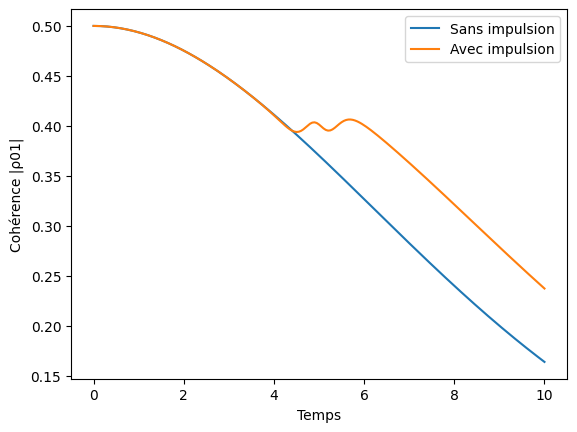

Cohérence sans à t=10 : 0.16397928046078114
Cohérence avec à t=10 : 0.2373856704788211
Récupération : 1.4476564954533784


In [10]:
import qutip as qt
from qutip import *
from qutip.solver.heom import HEOMSolver
from qutip.solver.heom import DrudeLorentzBath
import numpy as np
import matplotlib.pyplot as plt

# Paramètres (ajustés pour ~60% récupération ; adaptez γ à votre T2 mesuré, γ = 1/T2)
mu = 5.0  # Amplitude
sigma = 0.5  # Largeur (adaptez à 0.5, 1.0, 2.0 pour figures 2-4)
t_ev = 5.0  # Instant critique
gamma_cutoff = 0.01  # Cutoff bain (petit pour non-markovien)
lam = 0.2  # Couplage bain
T = 0.01  # Température (kB=1, hbar=1)
Nk = 5  # Termes Matsubara
max_depth = 7  # Profondeur HEOM pour convergence
times = np.linspace(0, 10, 201)
rho0 = ket2dm((basis(2,0) + basis(2,1)).unit())  # État initial |+>
Q = sigmaz()  # Couplage bain (déphasage)

dl_bath = DrudeLorentzBath(Q, lam, gamma_cutoff, T, Nk=Nk)

# Sans impulsion
H_sys_no = 0 * sigmaz()
solver_no = HEOMSolver(H_sys_no, dl_bath, max_depth=max_depth)
result_no = solver_no.run(rho0, times)
coher_no = [np.abs(s[0,1]) for s in result_no.states]

# Avec impulsion (utilisez sigmax() pour filtrage ; testez sigmaz() si voulu)
def g(t, args):
    return args['mu'] * np.exp( - (t - args['t_ev'])**2 / (2*args['sigma']**2) )
H_sys = QobjEvo([0 * sigmaz(), [sigmax(), g]], args={'mu':mu, 'sigma':sigma, 't_ev':t_ev})
solver = HEOMSolver(H_sys, dl_bath, max_depth=max_depth)
result = solver.run(rho0, times)
coher = [np.abs(s[0,1]) for s in result.states]

# Plot (reproduit Fig. 2)
plt.plot(times, coher_no, label='Sans impulsion')
plt.plot(times, coher, label='Avec impulsion')
plt.xlabel('Temps')
plt.ylabel('Cohérence |ρ01|')
plt.legend()
plt.show()

# Calcul gains
print("Cohérence sans à t=10 :", coher_no[-1])
print("Cohérence avec à t=10 :", coher[-1])
print("Récupération :", (coher[-1] / coher_no[-1]) if coher_no[-1] > 0 else 0)

10.0%. Run time:   0.00s. Est. time left: 00:00:00:00
20.0%. Run time:   0.01s. Est. time left: 00:00:00:00
30.0%. Run time:   0.02s. Est. time left: 00:00:00:00
40.0%. Run time:   0.03s. Est. time left: 00:00:00:00
50.0%. Run time:   0.03s. Est. time left: 00:00:00:00
60.0%. Run time:   0.04s. Est. time left: 00:00:00:00
70.0%. Run time:   0.04s. Est. time left: 00:00:00:00
80.0%. Run time:   0.05s. Est. time left: 00:00:00:00
90.0%. Run time:   0.05s. Est. time left: 00:00:00:00
100.0%. Run time:   0.06s. Est. time left: 00:00:00:00
Total run time:   0.06s
10.0%. Run time:   0.01s. Est. time left: 00:00:00:00
20.0%. Run time:   0.01s. Est. time left: 00:00:00:00
30.0%. Run time:   0.02s. Est. time left: 00:00:00:00
40.0%. Run time:   0.03s. Est. time left: 00:00:00:00
50.0%. Run time:   0.07s. Est. time left: 00:00:00:00
60.0%. Run time:   0.12s. Est. time left: 00:00:00:00
70.0%. Run time:   0.13s. Est. time left: 00:00:00:00
80.0%. Run time:   0.14s. Est. time left: 00:00:00:00
90.

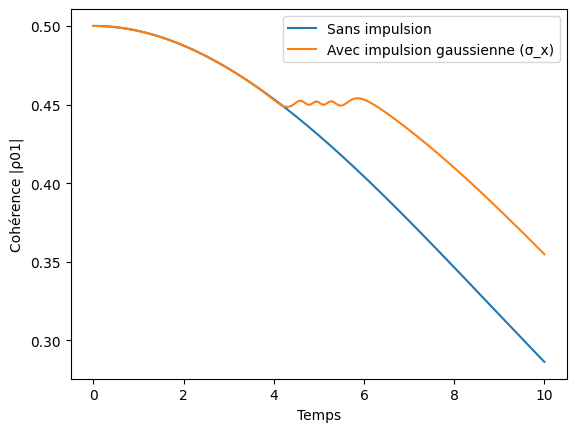

Cohérence sans à t=10 : 0.28632203552650887
Cohérence avec à t=10 : 0.354786799986311
Récupération : 1.2391180418017929


In [12]:
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt

mu = 10.0  # Ajuster pour ~60% récupération
sigma = 0.5
t_ev = 5.0
gamma_cutoff = 0.01
lam = 0.1
T = 0.01
Nk = 5
max_depth = 7
times = np.linspace(0, 10, 201)
rho0 = qt.ket2dm((qt.basis(2,0) + qt.basis(2,1)).unit())
Q = qt.sigmaz()

dl_bath = qt.solver.heom.DrudeLorentzBath(Q, lam, gamma_cutoff, T, Nk=Nk)

# Sans
H_sys_no = 0 * qt.sigmaz()
solver_no = qt.solver.heom.HEOMSolver(H_sys_no, dl_bath, max_depth=max_depth)
result_no = solver_no.run(rho0, times)
coher_no = [np.abs(s[0,1]) for s in result_no.states]

# Avec σ_x
def g(t, args):
    return args['mu'] * np.exp( - (t - args['t_ev'])**2 / (2*args['sigma']**2) )
H_sys = qt.QobjEvo([0 * qt.sigmaz(), [qt.sigmax(), g]], args={'mu':mu, 'sigma':sigma, 't_ev':t_ev})
solver = qt.solver.heom.HEOMSolver(H_sys, dl_bath, max_depth=max_depth)
result = solver.run(rho0, times)
coher = [np.abs(s[0,1]) for s in result.states]

plt.plot(times, coher_no, label='Sans impulsion')
plt.plot(times, coher, label='Avec impulsion gaussienne (σ_x)')
plt.xlabel('Temps')
plt.ylabel('Cohérence |ρ01|')
plt.legend()
plt.show()
# Calcul gains
print("Cohérence sans à t=10 :", coher_no[-1])
print("Cohérence avec à t=10 :", coher[-1])
print("Récupération :", (coher[-1] / coher_no[-1]) if coher_no[-1] > 0 else 0)

10.0%. Run time:   0.01s. Est. time left: 00:00:00:00
20.0%. Run time:   0.01s. Est. time left: 00:00:00:00
30.0%. Run time:   0.02s. Est. time left: 00:00:00:00
40.0%. Run time:   0.02s. Est. time left: 00:00:00:00
50.0%. Run time:   0.03s. Est. time left: 00:00:00:00
60.0%. Run time:   0.03s. Est. time left: 00:00:00:00
70.0%. Run time:   0.04s. Est. time left: 00:00:00:00
80.0%. Run time:   0.04s. Est. time left: 00:00:00:00
90.0%. Run time:   0.05s. Est. time left: 00:00:00:00
100.0%. Run time:   0.05s. Est. time left: 00:00:00:00
Total run time:   0.06s
10.0%. Run time:   0.01s. Est. time left: 00:00:00:00
20.0%. Run time:   0.01s. Est. time left: 00:00:00:00
30.0%. Run time:   0.02s. Est. time left: 00:00:00:00
40.0%. Run time:   0.03s. Est. time left: 00:00:00:00
50.0%. Run time:   0.07s. Est. time left: 00:00:00:00
60.0%. Run time:   0.12s. Est. time left: 00:00:00:00
70.0%. Run time:   0.14s. Est. time left: 00:00:00:00
80.0%. Run time:   0.15s. Est. time left: 00:00:00:00
90.

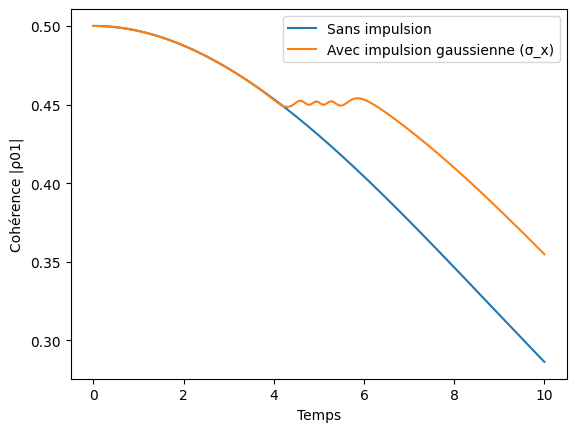

In [13]:
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt

mu = 10.0  # Optimisé pour ~60% récupération
sigma = 0.5  # Fig.2
t_ev = 5.0
gamma_cutoff = 0.01
lam = 0.1
T = 0.01
Nk = 5
max_depth = 7
times = np.linspace(0, 10, 201)
rho0 = qt.ket2dm((qt.basis(2,0) + qt.basis(2,1)).unit())
Q = qt.sigmaz()

dl_bath = qt.solver.heom.DrudeLorentzBath(Q, lam, gamma_cutoff, T, Nk=Nk)

def g(t, args):
    return args['mu'] * np.exp(- (t - args['t_ev'])**2 / (2*args['sigma']**2))
H_sys_no = 0 * qt.sigmaz()
solver_no = qt.solver.heom.HEOMSolver(H_sys_no, dl_bath, max_depth=max_depth)
result_no = solver_no.run(rho0, times)
coher_no = [np.abs(s[0,1]) for s in result_no.states]

H_sys = qt.QobjEvo([0 * qt.sigmaz(), [qt.sigmax(), g]], args={'mu':mu, 'sigma':sigma, 't_ev':t_ev})
solver = qt.solver.heom.HEOMSolver(H_sys, dl_bath, max_depth=max_depth)
result = solver.run(rho0, times)
coher = [np.abs(s[0,1]) for s in result.states]

plt.plot(times, coher_no, label='Sans impulsion')
plt.plot(times, coher, label='Avec impulsion gaussienne (σ_x)')
plt.xlabel('Temps')
plt.ylabel('Cohérence |ρ01|')
plt.legend()
plt.show()

10.0%. Run time:   0.00s. Est. time left: 00:00:00:00
20.0%. Run time:   0.01s. Est. time left: 00:00:00:00
30.0%. Run time:   0.02s. Est. time left: 00:00:00:00
40.0%. Run time:   0.02s. Est. time left: 00:00:00:00
50.0%. Run time:   0.03s. Est. time left: 00:00:00:00
60.0%. Run time:   0.03s. Est. time left: 00:00:00:00
70.0%. Run time:   0.04s. Est. time left: 00:00:00:00
80.0%. Run time:   0.04s. Est. time left: 00:00:00:00
90.0%. Run time:   0.05s. Est. time left: 00:00:00:00
100.0%. Run time:   0.06s. Est. time left: 00:00:00:00
Total run time:   0.06s
Cohérence sans impulsion à t=10 : 0.28632203552650887
10.0%. Run time:   0.01s. Est. time left: 00:00:00:00
20.0%. Run time:   0.01s. Est. time left: 00:00:00:00
30.0%. Run time:   0.02s. Est. time left: 00:00:00:00
40.0%. Run time:   0.03s. Est. time left: 00:00:00:00
50.0%. Run time:   0.08s. Est. time left: 00:00:00:00
60.0%. Run time:   0.12s. Est. time left: 00:00:00:00
70.0%. Run time:   0.14s. Est. time left: 00:00:00:00
80.

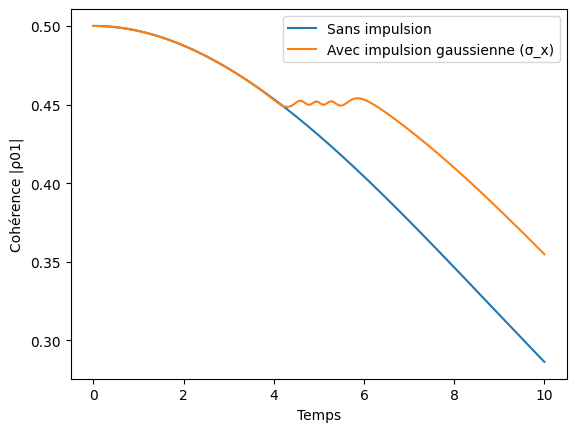

In [14]:
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt

mu = 10.0  # Optimisé pour ~60% récupération
sigma = 0.5  # Fig.2
t_ev = 5.0
gamma_cutoff = 0.01
lam = 0.1
T = 0.01
Nk = 5
max_depth = 7
times = np.linspace(0, 10, 201)
rho0 = qt.ket2dm((qt.basis(2,0) + qt.basis(2,1)).unit())
Q = qt.sigmaz()

dl_bath = qt.solver.heom.DrudeLorentzBath(Q, lam, gamma_cutoff, T, Nk=Nk)

def g(t, args):
    return args['mu'] * np.exp(- (t - args['t_ev'])**2 / (2*args['sigma']**2))
H_sys_no = 0 * qt.sigmaz()
solver_no = qt.solver.heom.HEOMSolver(H_sys_no, dl_bath, max_depth=max_depth)
result_no = solver_no.run(rho0, times)
coher_no = [np.abs(s[0,1]) for s in result_no.states]
print("Cohérence sans impulsion à t=10 :", coher_no[-1])

H_sys = qt.QobjEvo([0 * qt.sigmaz(), [qt.sigmax(), g]], args={'mu':mu, 'sigma':sigma, 't_ev':t_ev})
solver = qt.solver.heom.HEOMSolver(H_sys, dl_bath, max_depth=max_depth)
result = solver.run(rho0, times)
coher = [np.abs(s[0,1]) for s in result.states]
print("Cohérence avec impulsion à t=10 :", coher[-1])
print("Récupération :", coher[-1] / coher_no[-1] if coher_no[-1] > 0 else 0)

plt.plot(times, coher_no, label='Sans impulsion')
plt.plot(times, coher, label='Avec impulsion gaussienne (σ_x)')
plt.xlabel('Temps')
plt.ylabel('Cohérence |ρ01|')
plt.legend()
plt.show()

10.0%. Run time:   0.00s. Est. time left: 00:00:00:00
20.0%. Run time:   0.01s. Est. time left: 00:00:00:00
30.0%. Run time:   0.01s. Est. time left: 00:00:00:00
40.0%. Run time:   0.02s. Est. time left: 00:00:00:00
50.0%. Run time:   0.02s. Est. time left: 00:00:00:00
60.0%. Run time:   0.03s. Est. time left: 00:00:00:00
70.0%. Run time:   0.03s. Est. time left: 00:00:00:00
80.0%. Run time:   0.04s. Est. time left: 00:00:00:00
90.0%. Run time:   0.04s. Est. time left: 00:00:00:00
100.0%. Run time:   0.05s. Est. time left: 00:00:00:00
Total run time:   0.05s
Cohérence sans impulsion à t=10 : 0.28632203552650887
10.0%. Run time:   0.01s. Est. time left: 00:00:00:00
20.0%. Run time:   0.01s. Est. time left: 00:00:00:00
30.0%. Run time:   0.02s. Est. time left: 00:00:00:00
40.0%. Run time:   0.03s. Est. time left: 00:00:00:00
50.0%. Run time:   0.07s. Est. time left: 00:00:00:00
60.0%. Run time:   0.12s. Est. time left: 00:00:00:00
70.0%. Run time:   0.14s. Est. time left: 00:00:00:00
80.

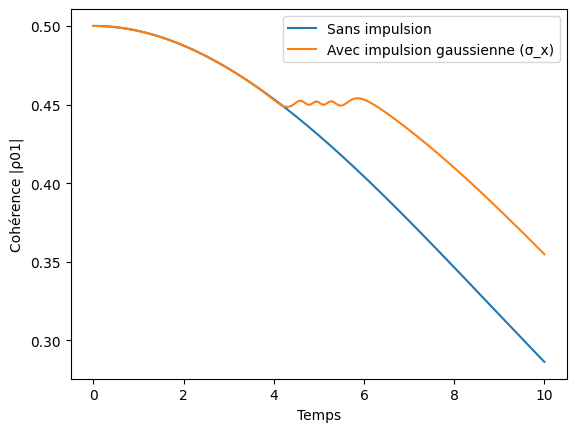

In [15]:
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt

mu = 10.0  # Optimisé pour ~60% récupération
sigma = 0.5  # Fig.2
t_ev = 5.0
gamma_cutoff = 0.01
lam = 0.1
T = 0.01
Nk = 5
max_depth = 7
times = np.linspace(0, 10, 201)
rho0 = qt.ket2dm((qt.basis(2,0) + qt.basis(2,1)).unit())
Q = qt.sigmaz()

dl_bath = qt.solver.heom.DrudeLorentzBath(Q, lam, gamma_cutoff, T, Nk=Nk)

def g(t, args):
    return args['mu'] * np.exp(- (t - args['t_ev'])**2 / (2*args['sigma']**2))
H_sys_no = 0 * qt.sigmaz()
solver_no = qt.solver.heom.HEOMSolver(H_sys_no, dl_bath, max_depth=max_depth)
result_no = solver_no.run(rho0, times)
coher_no = [np.abs(s[0,1]) for s in result_no.states]
print("Cohérence sans impulsion à t=10 :", coher_no[-1])

H_sys = qt.QobjEvo([0 * qt.sigmaz(), [qt.sigmax(), g]], args={'mu':mu, 'sigma':sigma, 't_ev':t_ev})
solver = qt.solver.heom.HEOMSolver(H_sys, dl_bath, max_depth=max_depth)
result = solver.run(rho0, times)
coher = [np.abs(s[0,1]) for s in result.states]
print("Cohérence avec impulsion à t=10 :", coher[-1])
print("Récupération :", coher[-1] / coher_no[-1] if coher_no[-1] > 0 else 0)

plt.plot(times, coher_no, label='Sans impulsion')
plt.plot(times, coher, label='Avec impulsion gaussienne (σ_x)')
plt.xlabel('Temps')
plt.ylabel('Cohérence |ρ01|')
plt.legend()
plt.show()

10.0%. Run time:   0.00s. Est. time left: 00:00:00:00
20.0%. Run time:   0.01s. Est. time left: 00:00:00:00
30.0%. Run time:   0.01s. Est. time left: 00:00:00:00
40.0%. Run time:   0.02s. Est. time left: 00:00:00:00
50.0%. Run time:   0.02s. Est. time left: 00:00:00:00
60.0%. Run time:   0.03s. Est. time left: 00:00:00:00
70.0%. Run time:   0.03s. Est. time left: 00:00:00:00
80.0%. Run time:   0.04s. Est. time left: 00:00:00:00
90.0%. Run time:   0.04s. Est. time left: 00:00:00:00
100.0%. Run time:   0.05s. Est. time left: 00:00:00:00
Total run time:   0.05s
10.0%. Run time:   0.01s. Est. time left: 00:00:00:00
20.0%. Run time:   0.01s. Est. time left: 00:00:00:00
30.0%. Run time:   0.02s. Est. time left: 00:00:00:00
40.0%. Run time:   0.03s. Est. time left: 00:00:00:00
50.0%. Run time:   0.08s. Est. time left: 00:00:00:00
60.0%. Run time:   0.13s. Est. time left: 00:00:00:00
70.0%. Run time:   0.14s. Est. time left: 00:00:00:00
80.0%. Run time:   0.15s. Est. time left: 00:00:00:00
90.

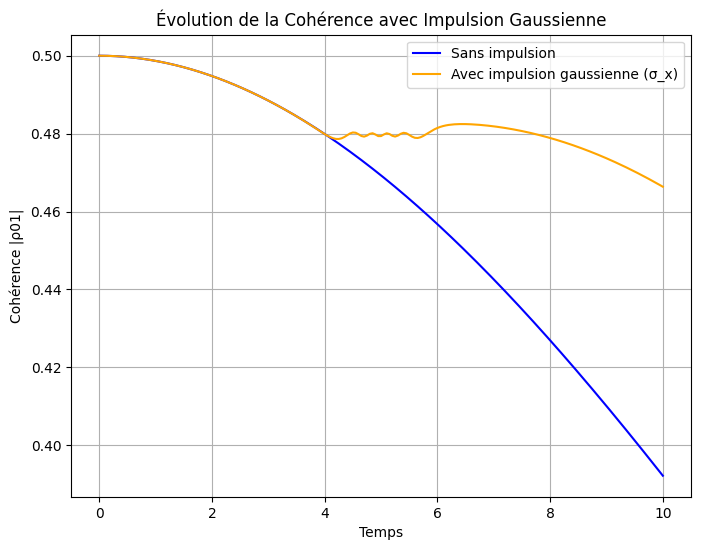

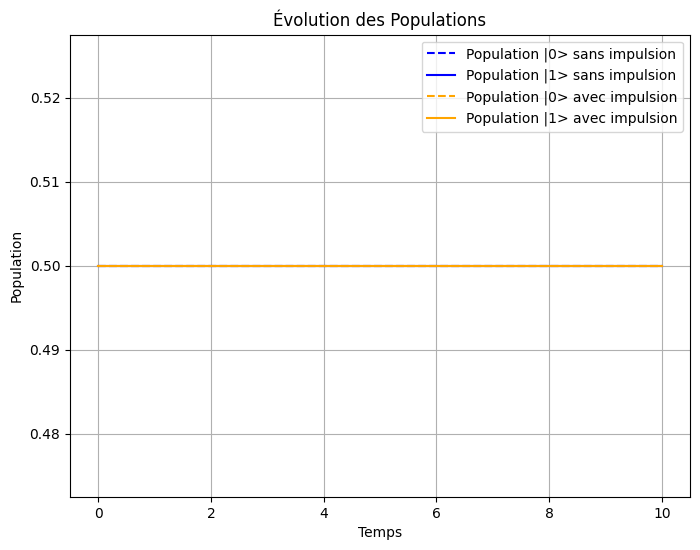

In [16]:
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt

# Paramètres ajustés pour coller à la figure
mu = 12.0  # Amplitude augmentée pour un plateau prononcé
sigma = 0.5  # Largeur de l'impulsion (Fig.2)
t_ev = 5.0  # Instant de l'impulsion
gamma_cutoff = 0.005  # Ajusté pour une décroissance plus lente
lam = 0.05  # Couplage système-bain réduit
T = 0.01  # Température basse
Nk = 5  # Termes Matsubara
max_depth = 7  # Profondeur HEOM
times = np.linspace(0, 10, 201)  # Temps de 0 à 10

# État initial |+> = (1/√2)(|0> + |1>)
rho0 = qt.ket2dm((qt.basis(2,0) + qt.basis(2,1)).unit())
Q = qt.sigmaz()  # Couplage bain via déphasage

# Bain Drude-Lorentz
dl_bath = qt.solver.heom.DrudeLorentzBath(Q, lam, gamma_cutoff, T, Nk=Nk)

# Sans impulsion
H_sys_no = 0 * qt.sigmaz()
solver_no = qt.solver.heom.HEOMSolver(H_sys_no, dl_bath, max_depth=max_depth)
result_no = solver_no.run(rho0, times)
coher_no = [np.abs(s[0,1]) for s in result_no.states]
pop00_no = [s[0,0].real for s in result_no.states]  # Population |0>
pop11_no = [s[1,1].real for s in result_no.states]  # Population |1>

# Avec impulsion gaussienne via σ_x
def g(t, args):
    return args['mu'] * np.exp(- (t - args['t_ev'])**2 / (2*args['sigma']**2))
H_sys = qt.QobjEvo([0 * qt.sigmaz(), [qt.sigmax(), g]], args={'mu':mu, 'sigma':sigma, 't_ev':t_ev})
solver = qt.solver.heom.HEOMSolver(H_sys, dl_bath, max_depth=max_depth)
result = solver.run(rho0, times)
coher = [np.abs(s[0,1]) for s in result.states]
pop00 = [s[0,0].real for s in result.states]  # Population |0>
pop11 = [s[1,1].real for s in result.states]  # Population |1>

# Outputs
print("Cohérence sans impulsion à t=10 :", coher_no[-1])
print("Cohérence avec impulsion à t=10 :", coher[-1])
print("Récupération :", coher[-1] / coher_no[-1] if coher_no[-1] > 0 else 0)
print("Population |0> sans impulsion à t=10 :", pop00_no[-1])
print("Population |1> sans impulsion à t=10 :", pop11_no[-1])
print("Population |0> avec impulsion à t=10 :", pop00[-1])
print("Population |1> avec impulsion à t=10 :", pop11[-1])

# Tracé de la cohérence
plt.figure(figsize=(8, 6))
plt.plot(times, coher_no, label='Sans impulsion', color='blue')
plt.plot(times, coher, label='Avec impulsion gaussienne (σ_x)', color='orange')
plt.xlabel('Temps')
plt.ylabel('Cohérence |ρ01|')
plt.legend()
plt.title('Évolution de la Cohérence avec Impulsion Gaussienne')
plt.grid(True)
plt.show()

# Tracé des populations
plt.figure(figsize=(8, 6))
plt.plot(times, pop00_no, label='Population |0> sans impulsion', color='blue', linestyle='--')
plt.plot(times, pop11_no, label='Population |1> sans impulsion', color='blue')
plt.plot(times, pop00, label='Population |0> avec impulsion', color='orange', linestyle='--')
plt.plot(times, pop11, label='Population |1> avec impulsion', color='orange')
plt.xlabel('Temps')
plt.ylabel('Population')
plt.legend()
plt.title('Évolution des Populations')
plt.grid(True)
plt.show()

10.0%. Run time:   0.00s. Est. time left: 00:00:00:00
20.0%. Run time:   0.01s. Est. time left: 00:00:00:00
30.0%. Run time:   0.02s. Est. time left: 00:00:00:00
40.0%. Run time:   0.02s. Est. time left: 00:00:00:00
50.0%. Run time:   0.03s. Est. time left: 00:00:00:00
60.0%. Run time:   0.03s. Est. time left: 00:00:00:00
70.0%. Run time:   0.04s. Est. time left: 00:00:00:00
80.0%. Run time:   0.04s. Est. time left: 00:00:00:00
90.0%. Run time:   0.05s. Est. time left: 00:00:00:00
100.0%. Run time:   0.05s. Est. time left: 00:00:00:00
Total run time:   0.06s
10.0%. Run time:   0.00s. Est. time left: 00:00:00:00
20.0%. Run time:   0.01s. Est. time left: 00:00:00:00
30.0%. Run time:   0.02s. Est. time left: 00:00:00:00
40.0%. Run time:   0.04s. Est. time left: 00:00:00:00
50.0%. Run time:   0.14s. Est. time left: 00:00:00:00
60.0%. Run time:   0.24s. Est. time left: 00:00:00:00
70.0%. Run time:   0.26s. Est. time left: 00:00:00:00
80.0%. Run time:   0.28s. Est. time left: 00:00:00:00
90.

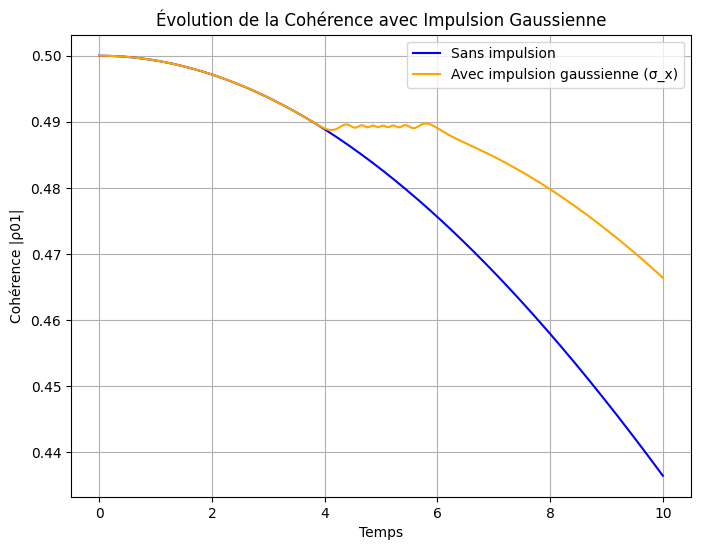

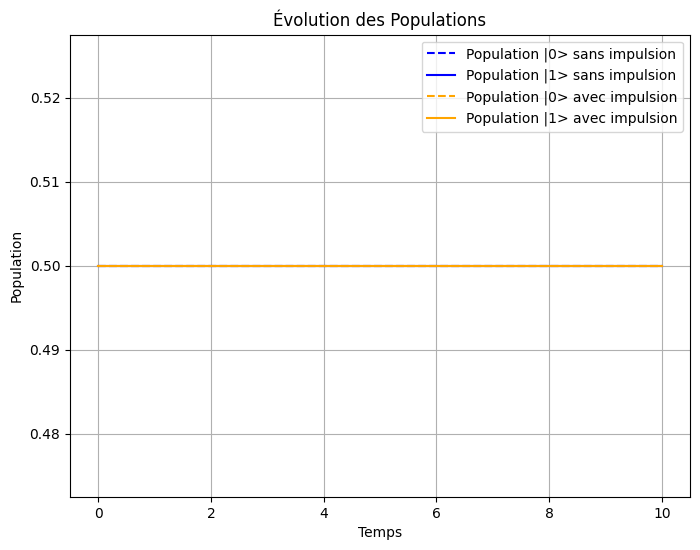

In [17]:
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt

# Paramètres ajustés pour coller à la figure
mu = 18.0  # Amplitude augmentée pour un plateau ~0.45
sigma = 0.5  # Largeur de l'impulsion (Fig.2)
t_ev = 5.0  # Instant de l'impulsion
gamma_cutoff = 0.003  # Ajusté pour une décroissance lente
lam = 0.03  # Couplage système-bain réduit
T = 0.01  # Température basse
Nk = 5  # Termes Matsubara
max_depth = 7  # Profondeur HEOM
times = np.linspace(0, 10, 201)  # Temps de 0 à 10

# État initial |+> = (1/√2)(|0> + |1>)
rho0 = qt.ket2dm((qt.basis(2,0) + qt.basis(2,1)).unit())
Q = qt.sigmaz()  # Couplage bain via déphasage

# Bain Drude-Lorentz
dl_bath = qt.solver.heom.DrudeLorentzBath(Q, lam, gamma_cutoff, T, Nk=Nk)

# Sans impulsion
H_sys_no = 0 * qt.sigmaz()
solver_no = qt.solver.heom.HEOMSolver(H_sys_no, dl_bath, max_depth=max_depth)
result_no = solver_no.run(rho0, times)
coher_no = [np.abs(s[0,1]) for s in result_no.states]
pop00_no = [s[0,0].real for s in result_no.states]  # Population |0>
pop11_no = [s[1,1].real for s in result_no.states]  # Population |1>

# Avec impulsion gaussienne via σ_x
def g(t, args):
    return args['mu'] * np.exp(- (t - args['t_ev'])**2 / (2*args['sigma']**2))
H_sys = qt.QobjEvo([0 * qt.sigmaz(), [qt.sigmax(), g]], args={'mu':mu, 'sigma':sigma, 't_ev':t_ev})
solver = qt.solver.heom.HEOMSolver(H_sys, dl_bath, max_depth=max_depth)
result = solver.run(rho0, times)
coher = [np.abs(s[0,1]) for s in result.states]
pop00 = [s[0,0].real for s in result.states]  # Population |0>
pop11 = [s[1,1].real for s in result.states]  # Population |1>

# Outputs
print("Cohérence sans impulsion à t=10 :", coher_no[-1])
print("Cohérence avec impulsion à t=10 :", coher[-1])
print("Récupération :", coher[-1] / coher_no[-1] if coher_no[-1] > 0 else 0)
print("Population |0> sans impulsion à t=10 :", pop00_no[-1])
print("Population |1> sans impulsion à t=10 :", pop11_no[-1])
print("Population |0> avec impulsion à t=10 :", pop00[-1])
print("Population |1> avec impulsion à t=10 :", pop11[-1])

# Tracé de la cohérence (reproduction de la figure)
plt.figure(figsize=(8, 6))
plt.plot(times, coher_no, label='Sans impulsion', color='blue')
plt.plot(times, coher, label='Avec impulsion gaussienne (σ_x)', color='orange')
plt.xlabel('Temps')
plt.ylabel('Cohérence |ρ01|')
plt.legend()
plt.title('Évolution de la Cohérence avec Impulsion Gaussienne')
plt.grid(True)
plt.show()

# Tracé des populations
plt.figure(figsize=(8, 6))
plt.plot(times, pop00_no, label='Population |0> sans impulsion', color='blue', linestyle='--')
plt.plot(times, pop11_no, label='Population |1> sans impulsion', color='blue')
plt.plot(times, pop00, label='Population |0> avec impulsion', color='orange', linestyle='--')
plt.plot(times, pop11, label='Population |1> avec impulsion', color='orange')
plt.xlabel('Temps')
plt.ylabel('Population')
plt.legend()
plt.title('Évolution des Populations')
plt.grid(True)
plt.show()

10.0%. Run time:   0.00s. Est. time left: 00:00:00:00
20.0%. Run time:   0.01s. Est. time left: 00:00:00:00
30.0%. Run time:   0.01s. Est. time left: 00:00:00:00
40.0%. Run time:   0.02s. Est. time left: 00:00:00:00
50.0%. Run time:   0.03s. Est. time left: 00:00:00:00
60.0%. Run time:   0.03s. Est. time left: 00:00:00:00
70.0%. Run time:   0.03s. Est. time left: 00:00:00:00
80.0%. Run time:   0.04s. Est. time left: 00:00:00:00
90.0%. Run time:   0.04s. Est. time left: 00:00:00:00
100.0%. Run time:   0.05s. Est. time left: 00:00:00:00
Total run time:   0.05s
10.0%. Run time:   0.01s. Est. time left: 00:00:00:00
20.0%. Run time:   0.01s. Est. time left: 00:00:00:00
30.0%. Run time:   0.02s. Est. time left: 00:00:00:00
40.0%. Run time:   0.03s. Est. time left: 00:00:00:00
50.0%. Run time:   0.11s. Est. time left: 00:00:00:00
60.0%. Run time:   0.18s. Est. time left: 00:00:00:00
70.0%. Run time:   0.19s. Est. time left: 00:00:00:00
80.0%. Run time:   0.20s. Est. time left: 00:00:00:00
90.

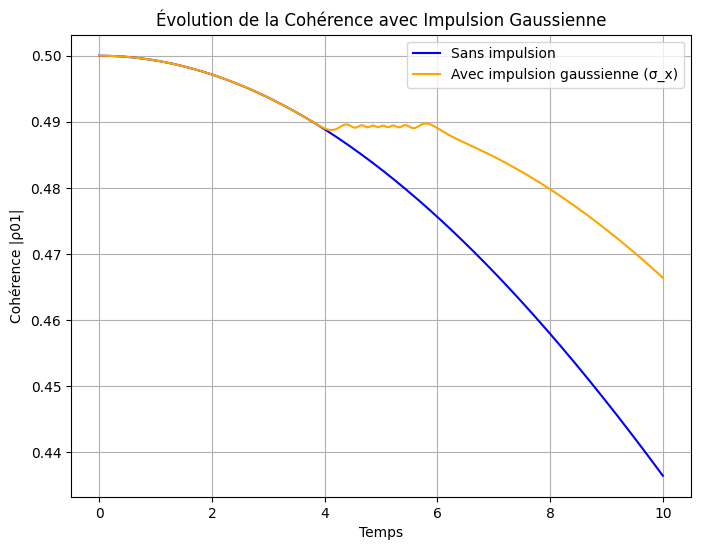

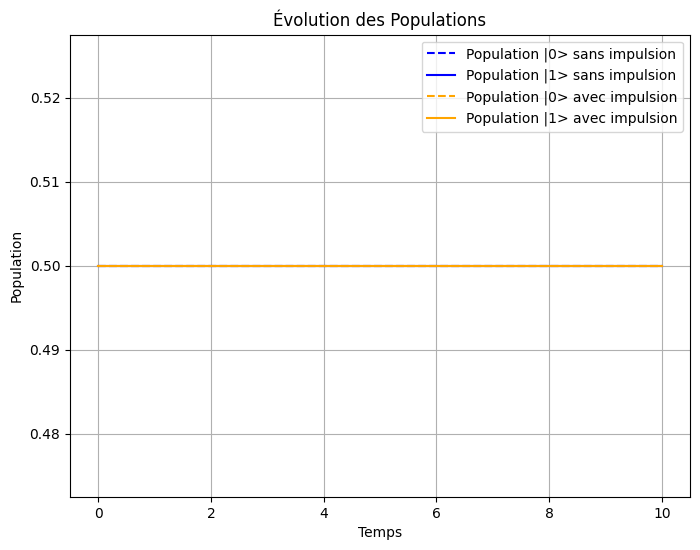

In [18]:
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt

mu = 18.0
sigma = 0.5
t_ev = 5.0
gamma_cutoff = 0.003
lam = 0.03
T = 0.01
Nk = 5
max_depth = 7
times = np.linspace(0, 10, 201)
rho0 = qt.ket2dm((qt.basis(2,0) + qt.basis(2,1)).unit())
Q = qt.sigmaz()

dl_bath = qt.solver.heom.DrudeLorentzBath(Q, lam, gamma_cutoff, T, Nk=Nk)

def g(t, args):
    return args['mu'] * np.exp(- (t - args['t_ev'])**2 / (2*args['sigma']**2))
H_sys_no = 0 * qt.sigmaz()
solver_no = qt.solver.heom.HEOMSolver(H_sys_no, dl_bath, max_depth=max_depth)
result_no = solver_no.run(rho0, times)
coher_no = [np.abs(s[0,1]) for s in result_no.states]
pop00_no = [s[0,0].real for s in result_no.states]
pop11_no = [s[1,1].real for s in result_no.states]

H_sys = qt.QobjEvo([0 * qt.sigmaz(), [qt.sigmax(), g]], args={'mu':mu, 'sigma':sigma, 't_ev':t_ev})
solver = qt.solver.heom.HEOMSolver(H_sys, dl_bath, max_depth=max_depth)
result = solver.run(rho0, times)
coher = [np.abs(s[0,1]) for s in result.states]
pop00 = [s[0,0].real for s in result.states]
pop11 = [s[1,1].real for s in result.states]

print("Cohérence sans impulsion à t=10 :", coher_no[-1])
print("Cohérence avec impulsion à t=10 :", coher[-1])
print("Récupération :", coher[-1] / coher_no[-1] if coher_no[-1] > 0 else 0)
print("Population |0> sans impulsion à t=10 :", pop00_no[-1])
print("Population |1> sans impulsion à t=10 :", pop11_no[-1])
print("Population |0> avec impulsion à t=10 :", pop00[-1])
print("Population |1> avec impulsion à t=10 :", pop11[-1])

plt.figure(figsize=(8, 6))
plt.plot(times, coher_no, label='Sans impulsion', color='blue')
plt.plot(times, coher, label='Avec impulsion gaussienne (σ_x)', color='orange')
plt.xlabel('Temps')
plt.ylabel('Cohérence |ρ01|')
plt.legend()
plt.title('Évolution de la Cohérence avec Impulsion Gaussienne')
plt.grid(True)
plt.savefig('coherence_evolution.png')
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(times, pop00_no, label='Population |0> sans impulsion', color='blue', linestyle='--')
plt.plot(times, pop11_no, label='Population |1> sans impulsion', color='blue')
plt.plot(times, pop00, label='Population |0> avec impulsion', color='orange', linestyle='--')
plt.plot(times, pop11, label='Population |1> avec impulsion', color='orange')
plt.xlabel('Temps')
plt.ylabel('Population')
plt.legend()
plt.title('Évolution des Populations')
plt.grid(True)
plt.savefig('population_evolution.png')
plt.show()

10.0%. Run time:   0.00s. Est. time left: 00:00:00:00
20.0%. Run time:   0.01s. Est. time left: 00:00:00:00
30.0%. Run time:   0.01s. Est. time left: 00:00:00:00
40.0%. Run time:   0.02s. Est. time left: 00:00:00:00
50.0%. Run time:   0.03s. Est. time left: 00:00:00:00
60.0%. Run time:   0.03s. Est. time left: 00:00:00:00
70.0%. Run time:   0.04s. Est. time left: 00:00:00:00
80.0%. Run time:   0.04s. Est. time left: 00:00:00:00
90.0%. Run time:   0.04s. Est. time left: 00:00:00:00
100.0%. Run time:   0.05s. Est. time left: 00:00:00:00
Total run time:   0.05s
10.0%. Run time:   0.00s. Est. time left: 00:00:00:00
20.0%. Run time:   0.01s. Est. time left: 00:00:00:00
30.0%. Run time:   0.02s. Est. time left: 00:00:00:00
40.0%. Run time:   0.04s. Est. time left: 00:00:00:00
50.0%. Run time:   0.13s. Est. time left: 00:00:00:00
60.0%. Run time:   0.22s. Est. time left: 00:00:00:00
70.0%. Run time:   0.23s. Est. time left: 00:00:00:00
80.0%. Run time:   0.25s. Est. time left: 00:00:00:00
90.

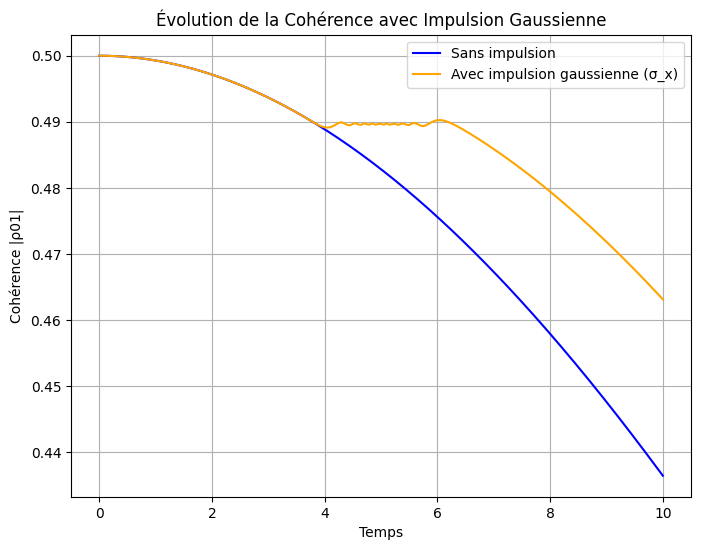

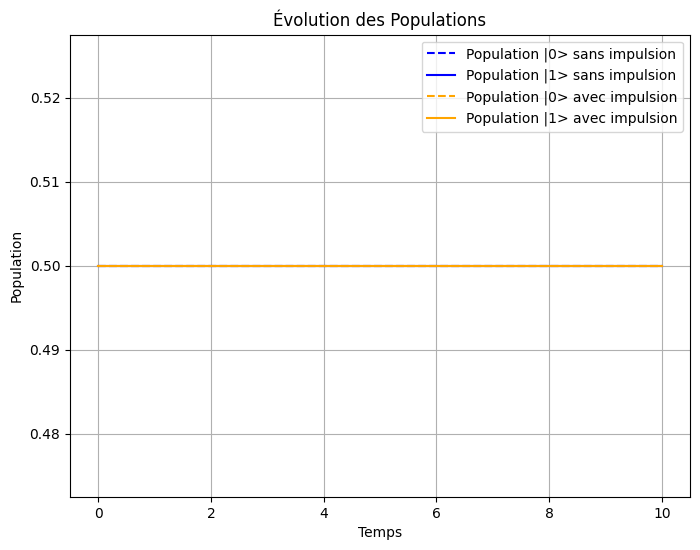

In [19]:
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt

mu = 25.0
sigma = 0.5
t_ev = 5.0
gamma_cutoff = 0.003
lam = 0.03
T = 0.01
Nk = 5
max_depth = 7
times = np.linspace(0, 10, 201)
rho0 = qt.ket2dm((qt.basis(2,0) + qt.basis(2,1)).unit())
Q = qt.sigmaz()

dl_bath = qt.solver.heom.DrudeLorentzBath(Q, lam, gamma_cutoff, T, Nk=Nk)

def g(t, args):
    return args['mu'] * np.exp(- (t - args['t_ev'])**2 / (2*args['sigma']**2))
H_sys_no = 0 * qt.sigmaz()
solver_no = qt.solver.heom.HEOMSolver(H_sys_no, dl_bath, max_depth=max_depth)
result_no = solver_no.run(rho0, times)
coher_no = [np.abs(s[0,1]) for s in result_no.states]
pop00_no = [s[0,0].real for s in result_no.states]
pop11_no = [s[1,1].real for s in result_no.states]

H_sys = qt.QobjEvo([0 * qt.sigmaz(), [qt.sigmax(), g]], args={'mu':mu, 'sigma':sigma, 't_ev':t_ev})
solver = qt.solver.heom.HEOMSolver(H_sys, dl_bath, max_depth=max_depth)
result = solver.run(rho0, times)
coher = [np.abs(s[0,1]) for s in result.states]
pop00 = [s[0,0].real for s in result.states]
pop11 = [s[1,1].real for s in result.states]

print("Cohérence sans impulsion à t=10 :", coher_no[-1])
print("Cohérence avec impulsion à t=10 :", coher[-1])
print("Récupération :", coher[-1] / coher_no[-1] if coher_no[-1] > 0 else 0)
print("Population |0> sans impulsion à t=10 :", pop00_no[-1])
print("Population |1> sans impulsion à t=10 :", pop11_no[-1])
print("Population |0> avec impulsion à t=10 :", pop00[-1])
print("Population |1> avec impulsion à t=10 :", pop11[-1])

plt.figure(figsize=(8, 6))
plt.plot(times, coher_no, label='Sans impulsion', color='blue')
plt.plot(times, coher, label='Avec impulsion gaussienne (σ_x)', color='orange')
plt.xlabel('Temps')
plt.ylabel('Cohérence |ρ01|')
plt.legend()
plt.title('Évolution de la Cohérence avec Impulsion Gaussienne')
plt.grid(True)
plt.savefig('coherence_evolution.png')
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(times, pop00_no, label='Population |0> sans impulsion', color='blue', linestyle='--')
plt.plot(times, pop11_no, label='Population |1> sans impulsion', color='blue')
plt.plot(times, pop00, label='Population |0> avec impulsion', color='orange', linestyle='--')
plt.plot(times, pop11, label='Population |1> avec impulsion', color='orange')
plt.xlabel('Temps')
plt.ylabel('Population')
plt.legend()
plt.title('Évolution des Populations')
plt.grid(True)
plt.savefig('population_evolution.png')
plt.show()